# Diagramme und Charts

Zum Leben eines Datenanalysten gehört Visualisierung und bei der Visualisierung in Python sind die Bibliotheken Matplotlib und Seaborn nicht wegzudenken. Diesen werden wir auch im Modul Datenvisualisierung später begegnen. Doch für unsere aktuelle Arbeit würden wir auch schon gerne vorzeigbare Plots produzieren.

Zum Glück hat Pandas die wichtigsten Dinge dafür bereits an Bord, denn Pandas bringt (eingeschränktere) Funktionalitäten mit, die auf Matplotlib aufbauen! 
Der Vorteil: Sie sind super leicht zu nutzen und können direkt am Dataframe oder einer Pandas Series aufgerufen werden!
Im Folgenden schauen wir uns das für ein paar klassische Arten von Plots an und nehmen hier und da auch eine kleine
designbezogene Einstellung vor.

In [5]:
import pandas as pd
import seaborn as sns
# import matplotlib.pyplot as plt
# Seaborn hier AUSSCHLIEßLICH wegen der Datensätze importiert!
# NICHT zur Visualisierung.

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    649 non-null    datetime64[ns]
 1   Price   649 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.3 KB


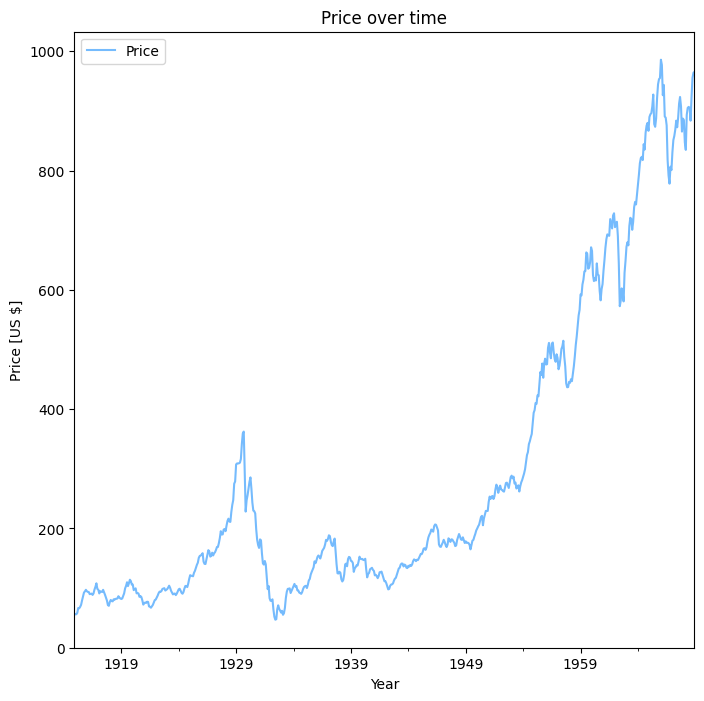

In [38]:
dowjones = sns.load_dataset('dowjones')
dowjones.head()
dowjones.info()
 
#dowjones.set_index('Date', inplace=True)
dowjones.plot(x='Date', y='Price', color='xkcd:sky blue', xlabel='Year', ylabel='Price [US $]', kind='line', title='Price over time', figsize=(8,8));

#sns.lineplot(x='Date', y='Price', linewidth=1, data=dowjones, color="green"); # ,--> suppressing output "<Axes: xlabel='Date'	ylabel='Price'> .."

## Das Liniendiagramm (lineplot)

Pandas nutzt (standardmäßig) matplotlib als Backend für seine Plot-Funktionen. Daher muss matplotlib installiert sein, damit `DataFrame.plot()` oder `Series.plot()` funktionieren. Falls matplotlib fehlt, wirft Pandas beim Plotten eine Fehlermeldung.

Wenn du einfach `dow_jones.plot()` aufrufst (ohne weitere Argumente) und in deinem DataFrame nur `date` (nicht numerisch) und `price` (numerisch) enthalten sind, entsteht standardmäßig ein **Liniendiagramm**, bei dem:

- Die **x-Achse** mit den **Index-Werten** (also 0, 1, 2, …) beschriftet wird – **nicht** mit dem Datumswert, sofern du nicht explizit `date` als Index gesetzt hast.  
- Die **y-Achse** zeigt den Verlauf der **preislichen** Werte (`price`) als Linie an.

Möchtest du die Datumswerte auf der x-Achse haben, hast du zwei gängige Optionen:
1. **Date-Spalte als Index setzen**:
   ```python
   dow_jones = dow_jones.set_index('date')
   dow_jones.plot()
   ```
   Dann nutzt pandas automatisch die Datumsangaben als x-Achse.

2. **x und y explizit angeben**:
   ```python
   dow_jones.plot(x='date', y='price')
   ```
   In diesem Fall bleibt der DataFrame-Index unverändert, aber beim Plotten werden die `date`-Werte auf der x-Achse verwendet.

Die Funktionsweise von groupby in Pandas kann anfangs etwas verwirrend sein, besonders wenn man sich mit der Iteration über die Gruppen und der Verwendung verschiedener Methoden befasst. Lass mich erklären, was genau hinter den Kulissen passiert, wenn wir ein groupby-Objekt verwenden und wie size() sowie die Iteration über Gruppennamen und -inhalte funktionieren.

Was passiert bei groupby?
Wenn du groupby auf einem DataFrame aufrufst, erstellt Pandas intern eine Gruppe für jeden einzigartigen Wert in der Spalte oder den Spalten, die du spezifiziert hast. Diese Gruppen sind jedoch nicht sofort sichtbar oder direkt zugänglich, weil groupby lediglich ein Zwischenobjekt zurückgibt, das als Anweisung dient, wie die Daten gruppiert werden sollen.

Iteration über ein groupby-Objekt
Das groupby-Objekt ist iterierbar, was bedeutet, dass du es in einer Schleife durchgehen kannst, um Zugriff auf den Namen der Gruppe und die Daten in jeder Gruppe zu erhalten. Hierbei steht name für den Schlüssel der Gruppe (zum Beispiel das Jahr, wenn nach 'year' gruppiert wird) und group für den tatsächlichen DataFrame, der alle Daten enthält, die zu dieser Gruppe gehören.

Hier sind fünf Aufgaben, die das Verständnis und die Anwendung der `groupby` Funktion in Pandas vertiefen können. Diese Aufgaben beziehen sich auf den `flights`-Datensatz aus Seaborn, der Flüge mit Informationen zu Jahren, Monaten und Passagieranzahlen enthält. 

### Aufgabe 1: Berechnung des durchschnittlichen Passagieraufkommens pro Jahr ohne `groupby`
**Ziel**: Manuell das durchschnittliche Passagieraufkommen pro Jahr berechnen, ohne die `groupby` Methode zu verwenden.
**Lösung**:
```python
import pandas as pd
import seaborn as sns

# Daten laden
flights = sns.load_dataset('flights')

# Manuelle Berechnung
sums_counts = {}
for index, row in flights.iterrows():
    year = row['year']
    passengers = row['passengers']
    if year in sums_counts:
        sums_counts[year][0] += passengers
        sums_counts[year][1] += 1
    else:
        sums_counts[year] = [passengers, 1]

averages = {year: total / count for year, (total, count) in sums_counts.items()}
pass_per_year_manual = pd.Series(averages)
print(pass_per_year_manual)
```

### Aufgabe 2: Durchschnittliche Passagieranzahl pro Jahr mit `groupby`
**Ziel**: Verwenden Sie `groupby`, um die durchschnittliche Anzahl von Passagieren pro Jahr zu berechnen.
**Lösung**:
```python
# Durchschnittliche Passagieranzahl pro Jahr berechnen
pass_per_year = flights.groupby('year')['passengers'].mean()
print(pass_per_year)
```

### Aufgabe 3: Maximale Passagieranzahl pro Monat über alle Jahre
**Ziel**: Finden Sie die maximale Anzahl von Passagieren für jeden Monat über alle Jahre hinweg.
**Lösung**:
```python
max_pass_per_month = flights.groupby('month')['passengers'].max()
print(max_pass_per_month)
```

### Aufgabe 4: Gesamtzahl der Passagiere pro Monat über alle Jahre
**Ziel**: Berechnen Sie die Gesamtzahl der Passagiere für jeden Monat über alle Jahre hinweg.
**Lösung**:
```python
total_pass_per_month = flights.groupby('month')['passengers'].sum()
print(total_pass_per_month)
```

### Aufgabe 5: Anzahl der Monate mit über 400 Passagieren pro Jahr
**Ziel**: Bestimmen Sie, wie viele Monate in jedem Jahr eine Passagieranzahl von über 400 hatten.
**Lösung**:
```python
months_over_400 = flights[flights['passengers'] > 400].groupby('year').size()
print(months_over_400)
```

Diese Aufgaben decken verschiedene Aspekte der Datengruppierung und -aggregation ab und zeigen, wie `groupby` in Kombination mit anderen Funktionen wie `sum()`, `max()`, `mean()` und Bedingungsfiltern genutzt werden kann, um aussagekräftige Analysen durchzuführen.

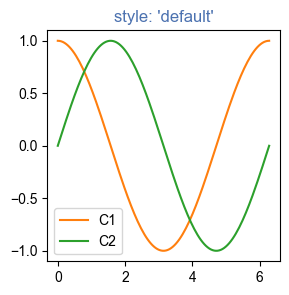

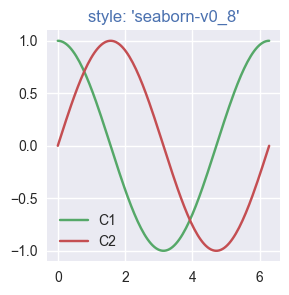

In [39]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

th = np.linspace(0, 2*np.pi, 128)


def demo(sty):
    mpl.style.use(sty)
    fig, ax = plt.subplots(figsize=(3, 3))

    ax.set_title(f'style: {sty!r}', color='C0')

    ax.plot(th, np.cos(th), 'C1', label='C1')
    ax.plot(th, np.sin(th), 'C2', label='C2')
    ax.legend()


demo('default')
demo('seaborn-v0_8')

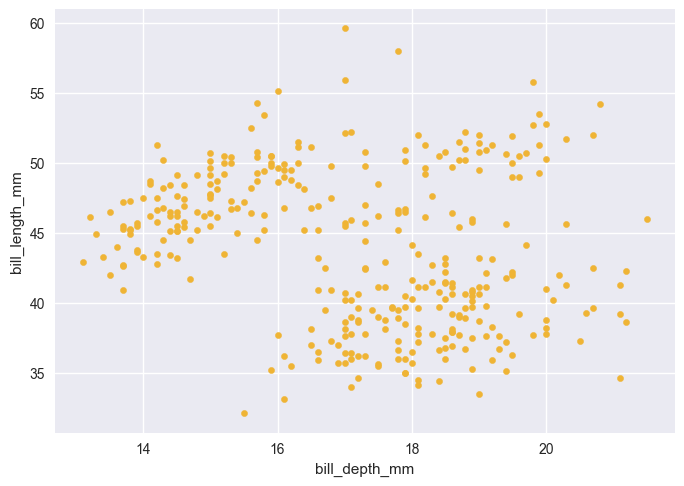

In [49]:
dfp = sns.load_dataset('penguins')
# ['species', 'island', 'bill_length_mm', 'bill_depth_mm',
#       'flipper_length_mm', 'body_mass_g', 'sex']
# [['']]
dfp[['bill_length_mm', 'bill_depth_mm']].plot(y = 'bill_length_mm',  x = 'bill_depth_mm', kind="scatter", color="xkcd:macaroni and cheese");

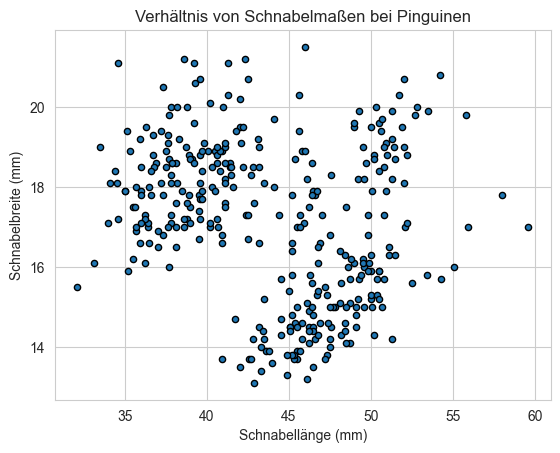

In [155]:
# Möglicher Output: